# **Importing the necessary dependencies**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np
import matplotlib.pyplot as plt

# **Defining the Dataset and Data Preprocessing**

In [2]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Data",
    batch_size=32,
    shuffle=True,
    image_size=(256,256),
)

Found 1730 files belonging to 3 classes.


In [3]:
class_name=dataset.class_names
class_name

['healthy', 'rust', 'scab']

In [4]:
len(dataset)

55

In [5]:
55*32

1760

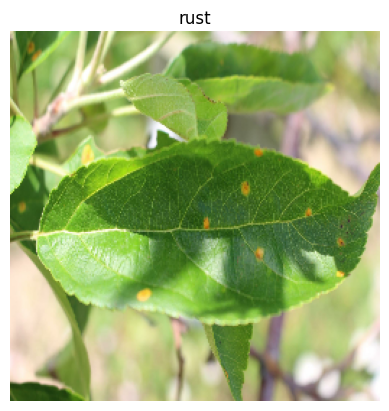

In [6]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_name[label_batch[0]])

In [7]:
def train_test_split(dataset,training_size=0.8,validation_size=0.1,test_size=0.1,shuffle=True,shuffle_size=1000):
    if shuffle:
        dataset=dataset.shuffle(shuffle_size,seed=12)
    train_size=int(len(dataset)*training_size)
    val_size=int(len(dataset)*validation_size)

    train_ds=dataset.take(train_size)
    val_ds=dataset.skip(train_size).take(val_size)
    test_ds=dataset.skip(train_size).skip(val_size)    
    
    return train_ds,val_ds,test_ds

In [8]:
train_ds,val_ds,test_ds=train_test_split(dataset)

In [9]:
len(train_ds)

44

In [10]:
len(test_ds)

6

In [11]:
len(val_ds)

5

In [12]:
len(dataset)

55

In [13]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(256,256),
    tf.keras.layers.experimental.preprocessing.Rescaling(1/255),
])

In [15]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

# **Building the Model**

In [59]:
input_shape=(32,256,256,3) 
model=models.Sequential([ 
    resize_and_rescale, 
    data_augmentation, 
    layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(32,256,256,3)), 
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"), 
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"), 
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"), 
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"), 
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"), 
    layers.MaxPooling2D((2,2)), 
    layers.Flatten(), 
    layers.Dense(64,activation="relu"), 
    layers.Dense(len(class_name),activation="softmax") 
                  ]) 
model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [19]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
history = model.fit( 
    train_ds, 
    epochs=30, 
    batch_size=32, 
    validation_data=val_ds, 
    verbose=1 
)

Epoch 1/30
44/44 [==============================] - 113s 2s/step - loss: 1.0964 - accuracy: 0.3621 - val_loss: 1.0973 - val_accuracy: 0.3438
Epoch 2/30
44/44 [==============================] - 112s 3s/step - loss: 1.0887 - accuracy: 0.3672 - val_loss: 1.0416 - val_accuracy: 0.3562
Epoch 3/30
44/44 [==============================] - 108s 2s/step - loss: 0.8886 - accuracy: 0.5428 - val_loss: 0.6262 - val_accuracy: 0.6875
Epoch 4/30
44/44 [==============================] - 95s 2s/step - loss: 0.5738 - accuracy: 0.6974 - val_loss: 0.5942 - val_accuracy: 0.6875
Epoch 5/30
44/44 [==============================] - 100s 2s/step - loss: 0.5553 - accuracy: 0.6792 - val_loss: 0.5666 - val_accuracy: 0.6750
Epoch 6/30
44/44 [==============================] - 105s 2s/step - loss: 0.5058 - accuracy: 0.7075 - val_loss: 0.5102 - val_accuracy: 0.7625
Epoch 7/30
44/44 [==============================] - 122s 3s/step - loss: 0.4878 - accuracy: 0.7511 - val_loss: 0.5189 - val_accuracy: 0.7375
Epoch 8/30
44/

In [21]:
history

In [24]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 44}

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

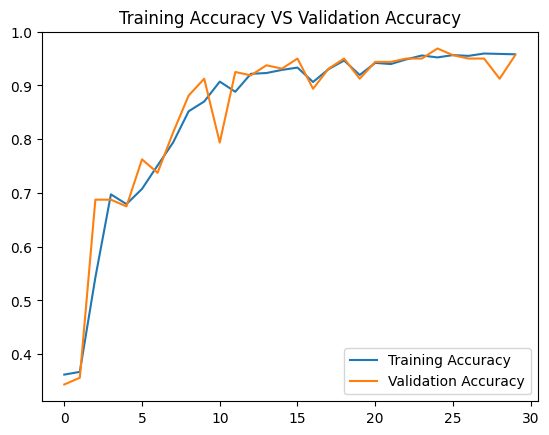

In [38]:
plt.title("Training Accuracy VS Validation Accuracy")
plt.plot(range(30),acc,label="Training Accuracy")
plt.plot(range(30),val_acc,label="Validation Accuracy")
plt.legend()
plt.show()


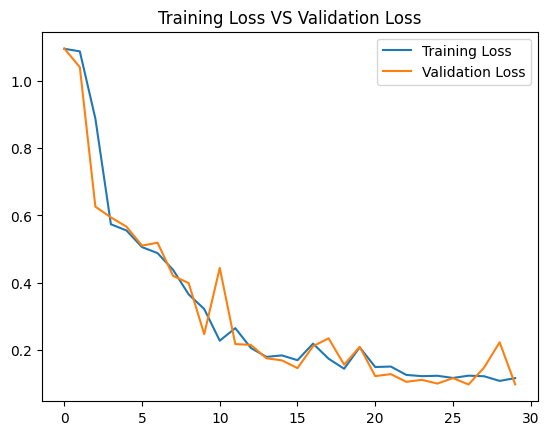

In [40]:
plt.title("Training Loss VS Validation Loss")
plt.plot(range(30),loss,label="Training Loss")
plt.plot(range(30),val_loss,label="Validation Loss")
plt.legend()
plt.show()

# **Testing the model**

In [42]:
scores=model.evaluate(test_ds)

6/6 [==============================] - 2s 289ms/step - loss: 0.0577 - accuracy: 0.9792


In [46]:
print("Accuracy of model on test_ds is",round(scores[1]*100,4),"%")

Accuracy of model on test_ds is 97.9167 %


first image to predict
actual label: rust
1/1 [==============================] - 0s 346ms/step
predicted label: Rust


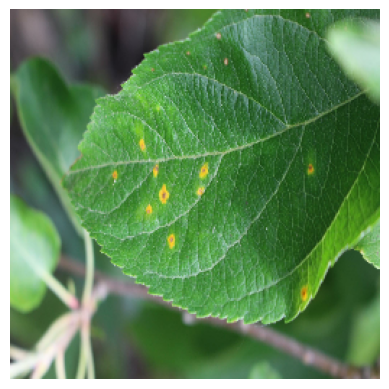

In [53]:
for images_batch, labels_batch in test_ds.take(1):
    plt.axis("off")
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])].capitalize())

# **Export the Model**

In [57]:
model.save(r"D:\Aakarsh\Coding\Plant Disease Identification\model")

INFO:tensorflow:Assets written to: D:\Aakarsh\Coding\Plant Disease Identification\model\assets


INFO:tensorflow:Assets written to: D:\Aakarsh\Coding\Plant Disease Identification\model\assets
